# Actividad 1
-----------------------

Alumno: Gonzalo Antonio Delgado Rubio
Curso: 06MBID_04_B_2024-25_Estadística avanzada

Seguro de viaje con el atributo objetivo de: Estado del reclamo (Sí o No)



| Atributo Ingles      | Atributo Español       | Significado                                          |
|-----------------------------|-----------------------------|------------------------------------------------------------|
| Claim                       | Estado del reclamo           | Claim Status                                               |
| Agency                      | Nombre de la agencia         | Agency Name                                                |
| Agency Type                 | Tipo de agencias de seguros  | Type of Insurance Agency                                   |
| Distribution Channel        | Canal de distribución        | Distribution Channel of Insurance Agency                    |
| Product Name                | Nombre de los productos      | Name of the Insurance Product                              |
| Duration                    | Duración del viaje           | Duration of the Trip                                       |
| Destination                 | Destino del viaje            | Destination of the Trip                                    |
| Net Sales                   | Monto de ventas              | Net Sales of Insurance Policies                            |
| Commision (in value)        | Comisión recibida            | Commission Received by Insurance Agency                     |
| Gender                      | Género del asegurado         | Gender of the Insured                                      |
| Age                         | Edad del asegurado           | Age of the Insured                                         |


URL DataSet:  https://www.kaggle.com/datasets/mhdzahier/travel-insurance/data

In [97]:
# Instalar y cargar las librerías necesarias
install.packages("caret")
install.packages("dplyr")
install.packages("ggplot2")
install.packages("psych")
library(psych)
library(caret)
library(dplyr)
library(ggplot2)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [98]:
# carga de dataset
df <- read.csv("dataset.csv")
head(df,1)

,ID,Age,Agency,Agency.Type,Commision..in.value.,Destination,Distribution.Channel,Duration,Gender,Net.Sales,Product.Name,Claim
,<int>,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>,<chr>,<int>
1,45341,28,C2B,Airlines,28.13,SINGAPORE,Online,34,F,112.5,Silver Plan,1


In [99]:
dim(df)

[1] 62288    12

## 1. Exploración de Datos

In [100]:
# Renombrar las columnas utilizando la función rename de dplyr

df <- df %>% rename(
  id = ID,
  age = Age,
  agency = Agency,
  agency_type = `Agency.Type`,
  commision = `Commision..in.value.`,
  destination = Destination,
  distribution_channel = `Distribution.Channel`,
  duration = Duration,
  gender = Gender,
  net_sales = `Net.Sales`,
  product_name = `Product.Name`,
  claim = Claim
)

# Mostrar las primeras 2 filas del DataFrame
head(df, 2)

,id,age,agency,agency_type,commision,destination,distribution_channel,duration,gender,net_sales,product_name,claim
,<int>,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>,<chr>,<int>
1,45341,28,C2B,Airlines,28.13,SINGAPORE,Online,34,F,112.5,Silver Plan,1
2,12958,37,JZI,Airlines,12.95,PHILIPPINES,Online,53,F,37.0,Basic Plan,0


In [101]:

# Obtener estadísticas descriptivas de todas las columnas
describe(df)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
id,1,62288,3.284495e+04,1.806542e+04,33446.50,3.308708e+04,22892.826600,0,63323.00,63323.00,-0.09030053,-1.1633701,7.238454e+01
age,2,62288,3.966632e+01,1.401465e+01,36.00,3.769584e+01,7.413000,0,118.00,118.00,2.86558337,12.4269866,5.615393e-02
agency*,3,62288,7.200729e+00,2.674967e+00,8.00,7.164513e+00,1.482600,1,16.00,15.00,-0.07415869,0.3235035,1.071806e-02
agency_type*,4,62288,1.655279e+00,4.752811e-01,2.00,1.694092e+00,0.000000,1,2.00,1.00,-0.65340786,-1.5730834,1.904357e-03
commision,5,62288,1.282970e+01,2.349874e+01,1.88,7.235987e+00,2.787288,0,262.76,262.76,3.36748063,16.5153677,9.415480e-02
destination*,6,62288,6.090452e+01,2.849731e+01,73.00,6.311366e+01,23.721600,1,102.00,101.00,-0.60548286,-0.8625374,1.141831e-01
distribution_channel*,7,62288,1.982083e+00,1.326501e-01,2.00,2.000000e+00,0.000000,1,2.00,1.00,-7.26837803,50.8301352,5.315025e-04
duration,8,62288,6.095880e+01,1.143253e+02,25.00,3.532459e+01,26.686800,-2,4881.00,4883.00,14.86221447,555.5211229,4.580789e-01
gender*,9,62288,1.544920e+00,7.800916e-01,1.00,1.431169e+00,0.000000,1,3.00,2.00,0.98997324,-0.6451385,3.125672e-03


observamos valores negativos para duration y net_sales, de la misma forma age tiene un valor maximo de 118 que podría resultar atipico

### 2.1 Nulidad de Datos

In [102]:
# Calcular la cantidad de valores nulos o vacios para todas las columnas de datos
porcentaje_nulos <- colSums(is.na(df) | df == "") / nrow(df) * 100
porcentaje_nulos

id                  age               agency 
             0.00000              0.00000              0.00000 
         agency_type            commision          destination 
             0.00000              0.00000              0.00000 
distribution_channel             duration               gender 
             0.00000              0.00000             63.53551 
           net_sales         product_name                claim 
             0.00000              0.00000              0.00000

observamos que variable gender tiene un 63.5% de valores nulos o vacio, se deberá evaluar si esta variable es relevante para los análisis futuros. A primera impresión podria parecer factible eliminarla

In [103]:
# Reemplazo string vacios por NA
df <- df %>%
  mutate(gender = ifelse(gender == "", NA, gender))

head(df,2)


,id,age,agency,agency_type,commision,destination,distribution_channel,duration,gender,net_sales,product_name,claim
,<int>,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>,<chr>,<int>
1,45341,28,C2B,Airlines,28.13,SINGAPORE,Online,34,F,112.5,Silver Plan,1
2,12958,37,JZI,Airlines,12.95,PHILIPPINES,Online,53,F,37.0,Basic Plan,0


#### 2.3 Quitar Datos Considerados Errores

In [104]:
# Cantidad de datos con valores negativos
cat("Cantidad de datos negativos para net_sales:", sum(df$net_sales < 0), "\n")
cat("Cantidad de datos negativos para duration:", sum(df$duration < 0), "\n")

Cantidad de datos negativos para net_sales: 584 
Cantidad de datos negativos para duration: 4 


In [105]:
# Los datos se duración y net_sales con valores negativos deberian ser eliminados de nuestro dataset al considerarse como datos erroneos
df <- df[df$net_sales >= 0 & df$duration >= 0, ]
head(df)


,id,age,agency,agency_type,commision,destination,distribution_channel,duration,gender,net_sales,product_name,claim
,<int>,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>,<chr>,<int>
1,45341,28,C2B,Airlines,28.13,SINGAPORE,Online,34,F,112.5,Silver Plan,1
2,12958,37,JZI,Airlines,12.95,PHILIPPINES,Online,53,F,37.0,Basic Plan,0
3,18233,27,EPX,Travel Agency,0.00,UNITED STATES,Online,28,NA,13.0,Cancellation Plan,0
4,31742,36,EPX,Travel Agency,0.00,SAUDI ARABIA,Online,1,NA,34.0,Cancellation Plan,0
5,14381,26,CWT,Travel Agency,23.76,THAILAND,Online,33,NA,39.6,Rental Vehicle Excess Insurance,0
6,9279,39,CWT,Travel Agency,59.40,AUSTRALIA,Online,78,NA,99.0,Rental Vehicle Excess Insurance,0


#### 2.2 Verificar la existencia de duplicados

In [106]:
# cantidad registros
dim(df)

[1] 61700    12

In [107]:
# identificando duplicados
duplicate_columns <- df[duplicated(df), ]
duplicate_columns <- duplicate_columns[order(names(duplicate_columns))]
head(duplicate_columns, 5)

,age,agency,agency_type,claim,commision,destination,distribution_channel,duration,gender,id,net_sales,product_name
,<int>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<int>,<chr>,<int>,<dbl>,<chr>
291,44,LWC,Travel Agency,1,49.73,FRANCE,Online,31,M,56061,76.5,Single Trip Travel Protect Gold
386,36,EPX,Travel Agency,1,0.00,VIET NAM,Online,19,NA,36469,25.0,2 way Comprehensive Plan
553,25,C2B,Airlines,1,64.80,SINGAPORE,Online,366,F,44757,259.2,Annual Silver Plan
608,24,C2B,Airlines,1,103.00,SINGAPORE,Online,166,M,60771,412.0,Silver Plan
640,26,C2B,Airlines,1,64.80,SINGAPORE,Online,365,F,48460,259.2,Annual Silver Plan


In [108]:
# cantidad de datos duplicados
dim(duplicate_columns)

[1] 11493    12

In [109]:
# data sin duplicados
df_clean <- unique(df)
dim(df_clean)

[1] 50207    12

## 3. Analisis Exploratorio De los Datos

En este apartado nos encargaremos de realizar el análisis a las variables categoricas y numericas asi como a nuestro target para visualizar temas de balance

#### 3.1 Validando Distribución Clase Objetivo Claim

In [110]:
df_clean %>%
    group_by(claim) %>%
    summarise(count = n()) %>%
    mutate(proportion = round(count / nrow(df_clean), 4))

claim,count,proportion
<int>,<int>,<dbl>
0,49284,0.9816
1,923,0.0184


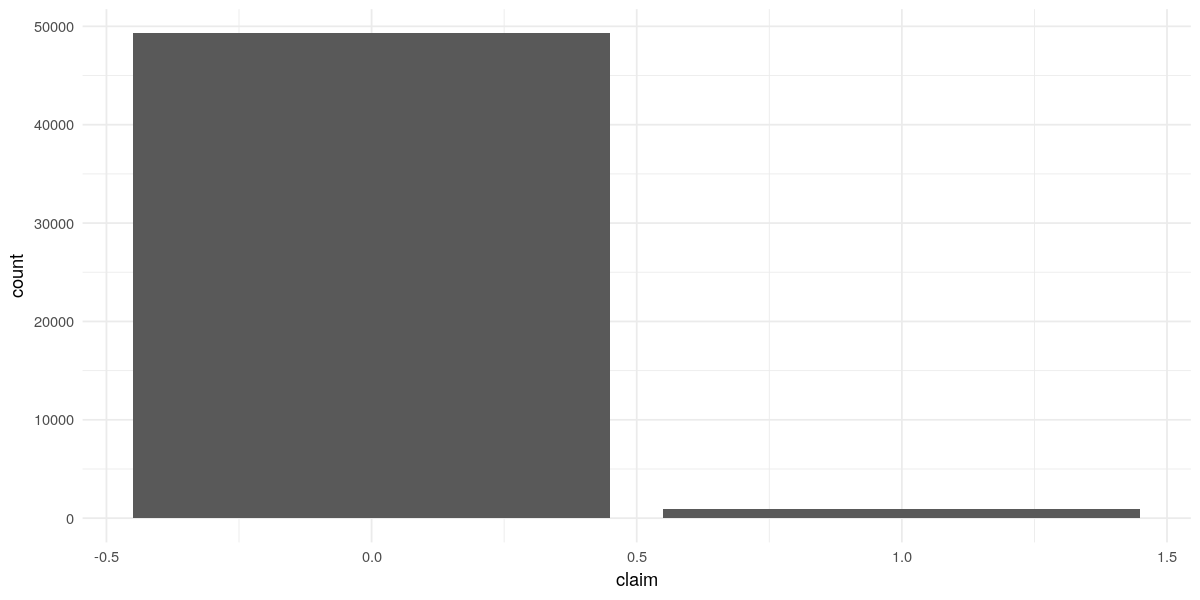

In [111]:
# grafico barras para clase target
ggplot(df_clean, aes(x = claim)) +
    geom_bar() +
    theme_minimal()

Las reclamaciones de seguros de viaje de la mayoría de los clientes fueron rechazadas por las agencias de seguros. Sólo se aceptó un número mínimo de reclamaciones de seguros. Esto sugiere que se trata de un conjunto de datos muy desequilibrado que debe equilibrarse más adelante para garantizar que no afecte negativamente al rendimiento de los algoritmos de aprendizaje automático.

In [112]:
head(df_clean,2)

,id,age,agency,agency_type,commision,destination,distribution_channel,duration,gender,net_sales,product_name,claim
,<int>,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>,<chr>,<int>
1,45341,28,C2B,Airlines,28.13,SINGAPORE,Online,34,F,112.5,Silver Plan,1
2,12958,37,JZI,Airlines,12.95,PHILIPPINES,Online,53,F,37.0,Basic Plan,0


### 3.2 Identificación de tipos de Variables

De acuerdo a la exploración del datset podemos distinguir a las variables numéricas y categóricas según las columnas

In [113]:
# Identificar variables numéricas
variables_numericas <- c('age', 'commision', 'duration', 'net_sales')

# Identificar variables categóricas  -- 'gender' no se incluye dado que se descartó en el análisis
variables_categoricas <- c('agency', 'agency_type', 'destination', 'distribution_channel', 'product_name', 'gender')

# Imprimir las listas
print("Variables numéricas:")
print(variables_numericas)
print("Variables categóricas:")
print(variables_categoricas)


[1] "Variables numéricas:"
[1] "age"       "commision" "duration"  "net_sales"
[1] "Variables categóricas:"
[1] "agency"               "agency_type"          "destination"         
[4] "distribution_channel" "product_name"         "gender"              


#### 3.2.1 Exploración atributos numericos

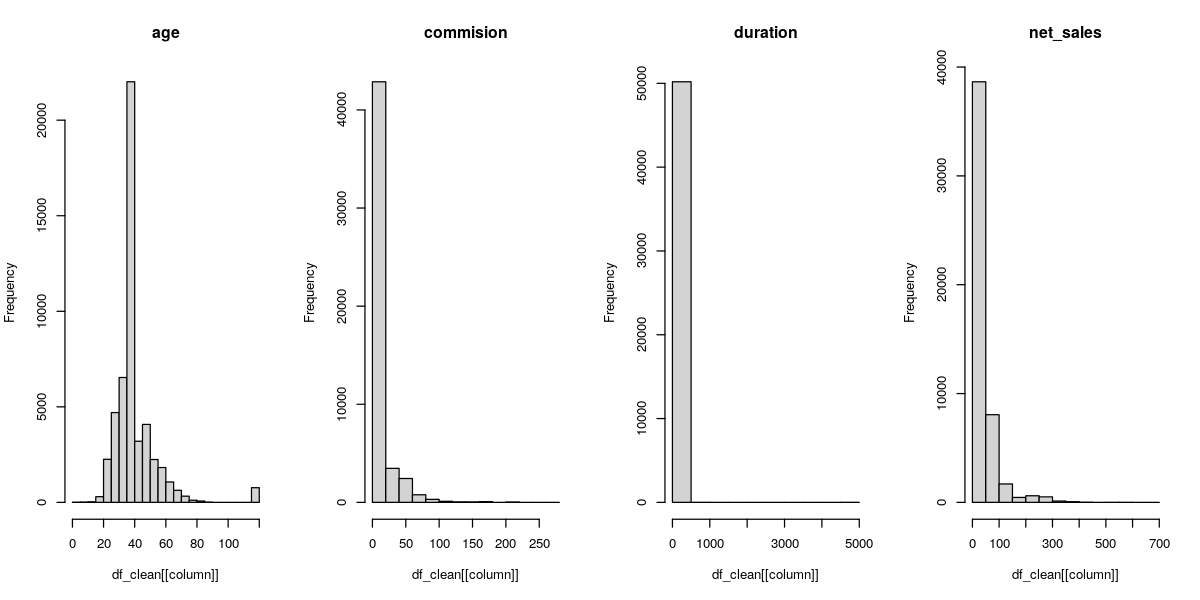

In [114]:
# Ampliar la salida de la imagen para Jupyter Notebook
options(repr.plot.width = 10, repr.plot.height = 5)

# Creando un histograma para cada variable numérica
par(mfrow = c(1, length(variables_numericas)))
for (column in variables_numericas) {
    hist(df_clean[[column]], main = column)
}


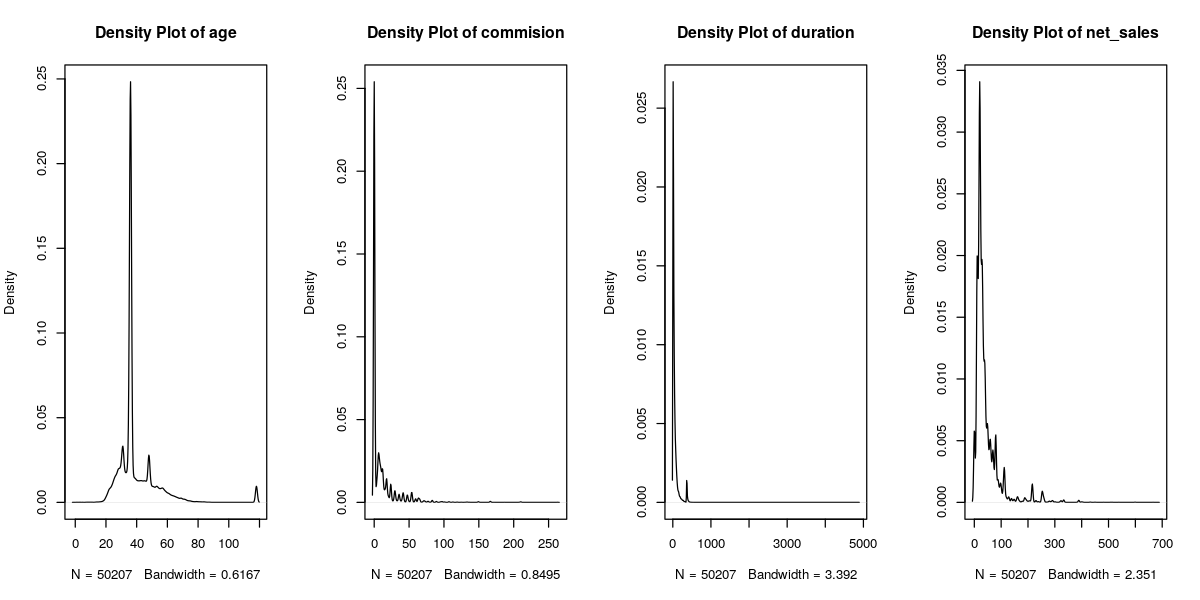

In [115]:
# Obteniendo gráficos de densidad para atributos numéricos
par(mfrow = c(1, length(variables_numericas)))
for (i in 1:length(variables_numericas)) {
    density_plot <- density(df_clean[[variables_numericas[i]]])
    plot(density_plot, main = paste("Density Plot of", variables_numericas[i]))
}

Observamos que para todas nuestras variables la data no se encontraría correctamente distribuida por lo que se entendería que existen muchos valores atipicos.

La variable que tendría mejor distribución seria el de edad

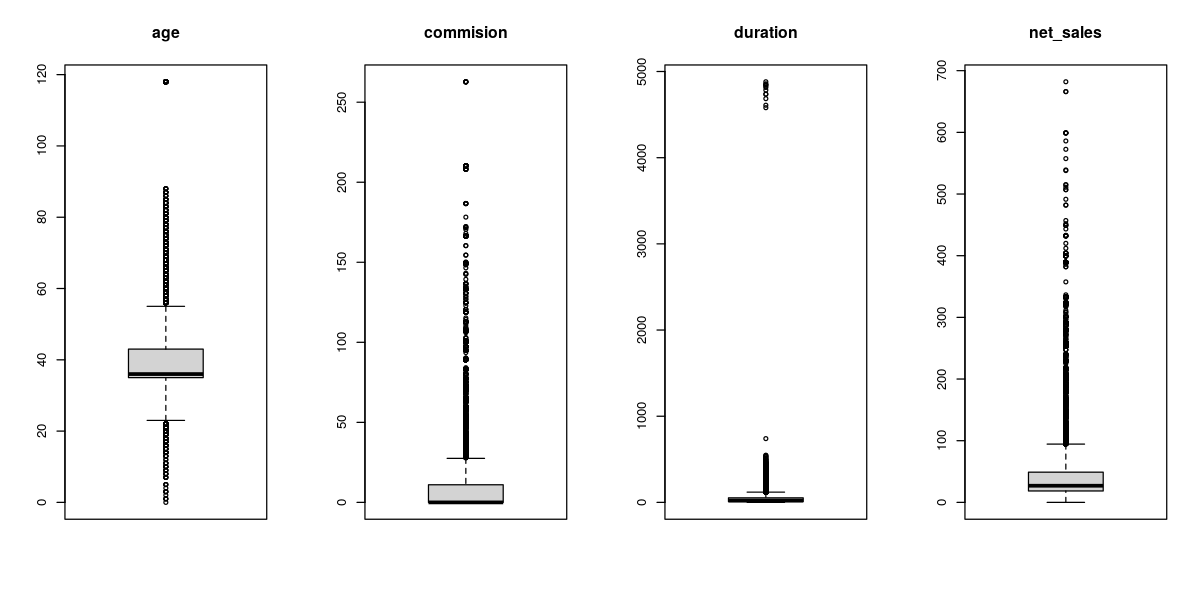

In [116]:
# Crear graficos de caja para atributos numericos
# Crear gráficos de caja para atributos numéricos
par(mfrow = c(1, length(variables_numericas)))
for (i in 1:length(variables_numericas)) {
    boxplot(df_clean[[variables_numericas[i]]], main = variables_numericas[i])
}

observamos datos fueras de dominio para todos atributos numericos, estos serán tratados más adelante

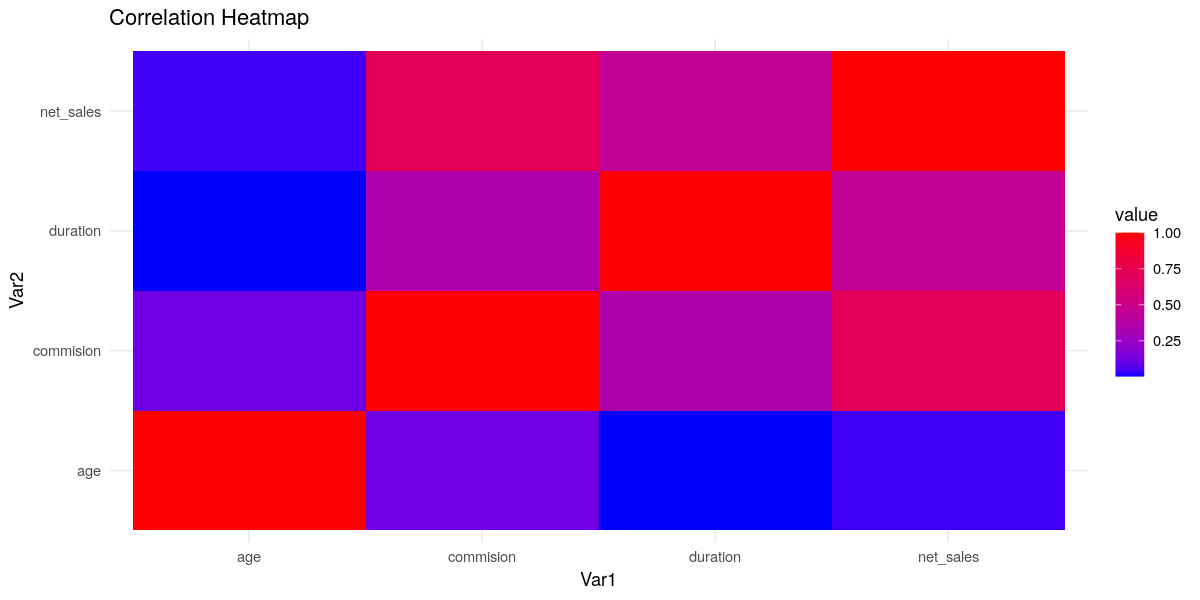

In [117]:
# generamos mapa de calor para conocer correlación entre las variables
library(ggplot2)
library(reshape2)

correlation_matrix <- cor(df_clean[variables_numericas])
melted_correlation <- melt(correlation_matrix)

ggplot(data = melted_correlation, aes(x = Var1, y = Var2, fill = value)) +
    geom_tile() +
    scale_fill_gradient(low = "blue", high = "red") +
    labs(title = "Correlation Heatmap") +
    theme_minimal()

observamos correlación positiva entre los datos de net_sales y commision

#### 3.2.2 Exploración atributos Categoricos

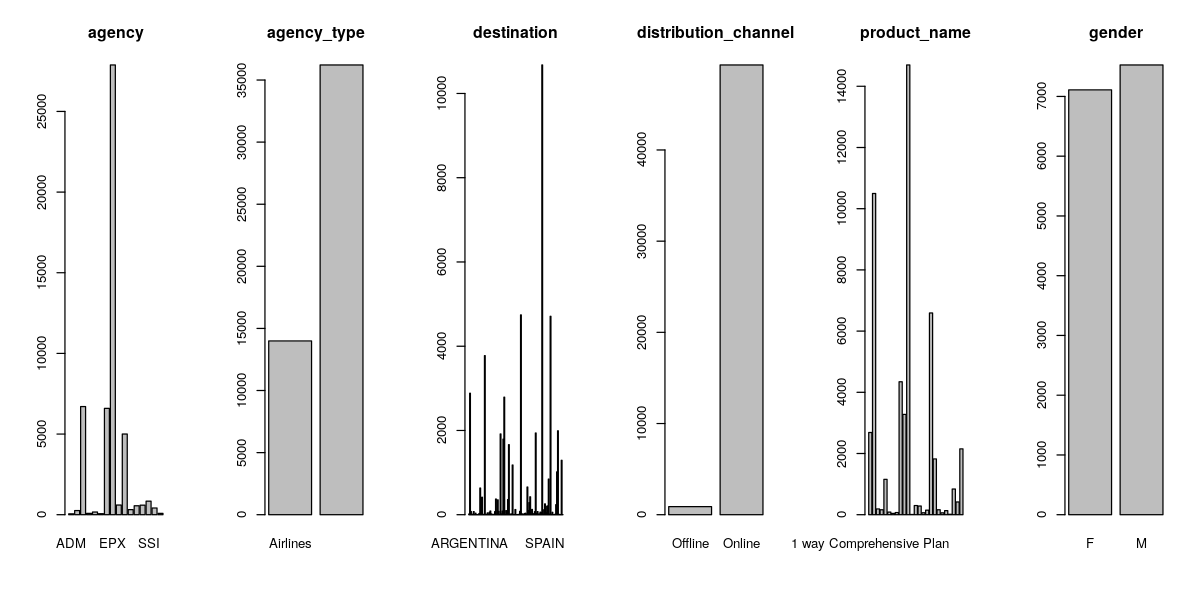

In [118]:
# Crear graficos por cada atributo categórico
# Create plots for each categorical attribute
par(mfrow = c(1, length(variables_categoricas)))
for (i in 1:length(variables_categoricas)) {
    barplot(table(df_clean[[variables_categoricas[i]]]), main = variables_categoricas[i])
}


Se observa que agency_type preferida es agencia de viajes, se prefiere canal de distribusión online. Para el resto de variables se explorará a detalle

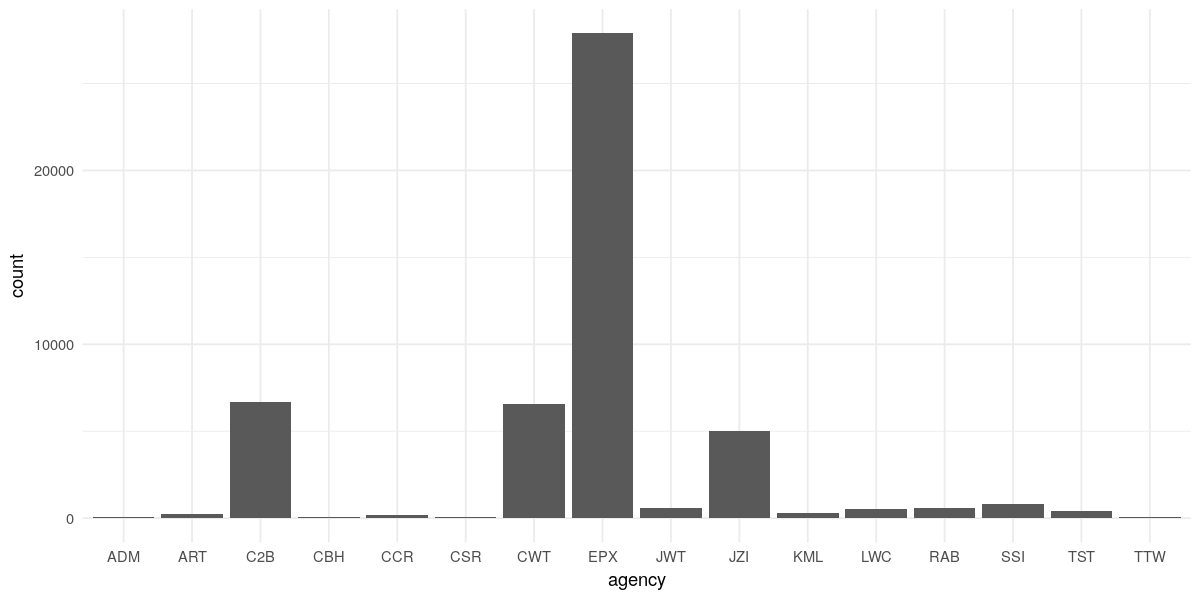

In [119]:
# ampliando vista agencias
library(ggplot2)

ggplot(df_clean, aes(x = agency)) +
    geom_bar() +
    theme_minimal()

agencia con mayor numero de reclamos EPX

In [120]:
netsales_mean <- df_clean %>%
    group_by(agency) %>%
    summarise(net_sales_mean = mean(net_sales)) %>%
    arrange(desc(net_sales_mean)) %>%
    head(10)

netsales_mean

agency,net_sales_mean
<chr>,<dbl>
LWC,114.31315
TTW,93.02353
ADM,85.18519
C2B,80.37781
KML,56.53165
JWT,54.45910
CWT,47.64976
EPX,32.89674
JZI,32.57186


In [121]:
# Generaré variable categorica en base a destination según riesgo de reclamo

df_clean$destination_category <- ifelse(df_clean$destination >= 0.3, "(1) High Risk - Claim > 30%",
                                        ifelse(df_clean$destination >= 0.2, "(2) Medium Risk - Claim > 20%",
                                               ifelse(df_clean$destination > 0, "(3) Low Risk - Claim > 1%", "(4) No Claim")))

head(df_clean, 2)


,id,age,agency,agency_type,commision,destination,distribution_channel,duration,gender,net_sales,product_name,claim,destination_category
,<int>,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>,<chr>,<int>,<chr>
1,45341,28,C2B,Airlines,28.13,SINGAPORE,Online,34,F,112.5,Silver Plan,1,(1) High Risk - Claim > 30%
2,12958,37,JZI,Airlines,12.95,PHILIPPINES,Online,53,F,37.0,Basic Plan,0,(1) High Risk - Claim > 30%


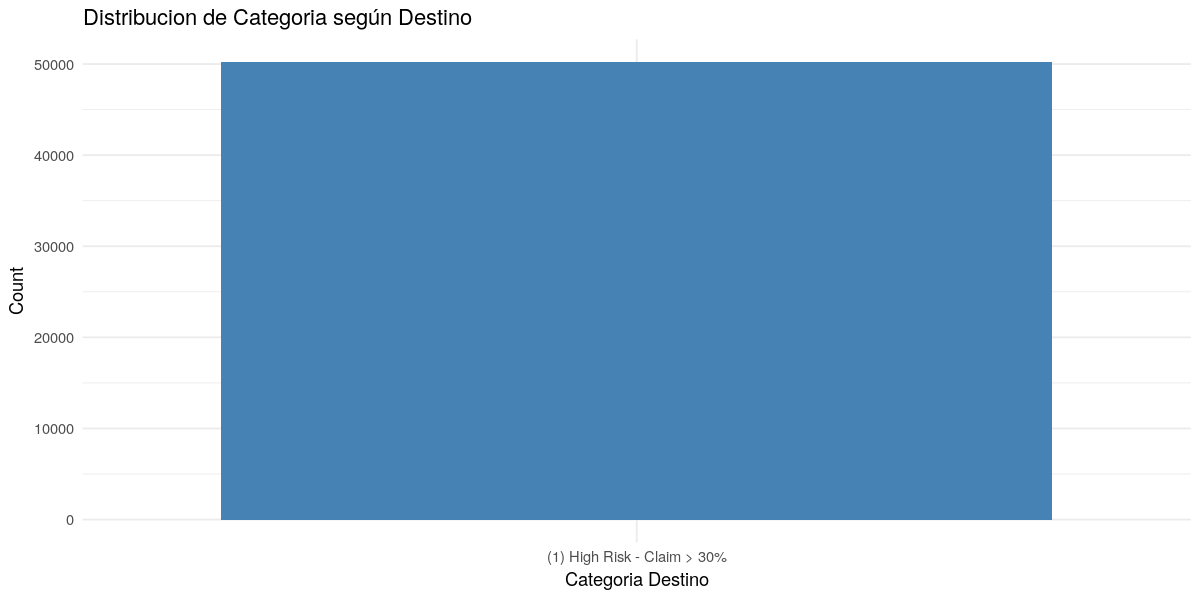

In [122]:
# Ampliando vista de categoría de destino
ggplot(df_clean, aes(x = destination_category)) +
    geom_bar(fill = "steelblue") +
    theme_minimal() +
    labs(x = "Categoria Destino", y = "Count", title = "Distribucion de Categoria según Destino")


## 4. Construcción de Features

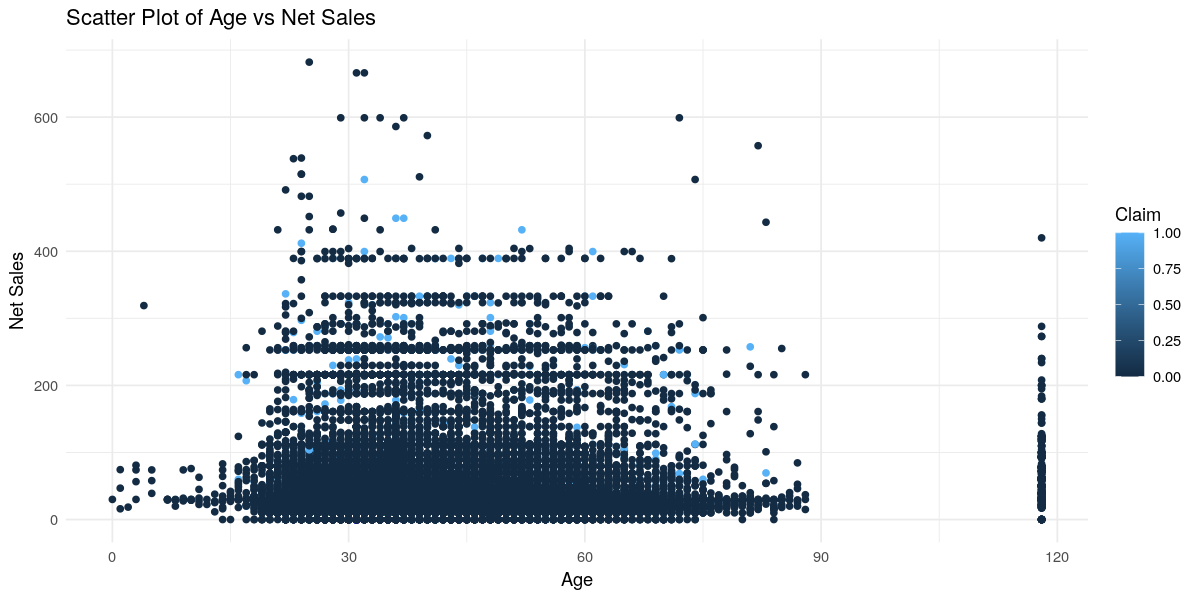

In [123]:

ggplot(df_clean, aes(x = age, y = net_sales, color = claim)) +
    geom_point() +
    theme_minimal() +
    labs(x = "Age", y = "Net Sales", color = "Claim") +
    ggtitle("Scatter Plot of Age vs Net Sales")


### 4.1 Aplicando Transformación Logaritmica a Variables Numericas

#### 4.1.1 Tratamiento de Outliers 

In [137]:
tratamiento_outlier <- function(data, col) {
    lower_limit <- quantile(data[col], 0.25)
    upper_limit <- quantile(data[col], 0.75)
    # Calculo Rango intercuartil
    IQR <- upper_limit - lower_limit
    # Definiendo los whiskers
    lower_whisker <- lower_limit - 1.5 * IQR
    upper_whisker <- upper_limit + 1.5 * IQR
    return(ifelse(data[col] > upper_whisker, upper_whisker, ifelse(data[col] < lower_whisker, lower_whisker, data[col])))
}


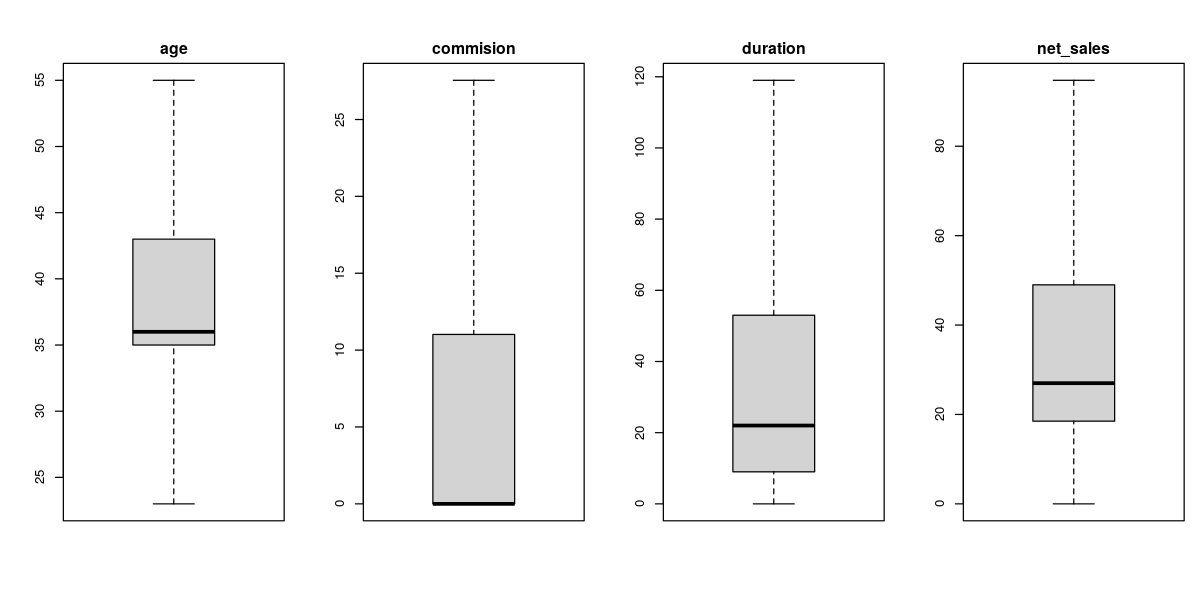

In [138]:

# Crear gráficos de caja para atributos numéricos
par(mfrow = c(1, length(variables_numericas)), mar = c(5, 4, 2, 1), oma = c(0, 0, 2, 0))

# Generar diagramas de caja luego del tratamiento de outliers
for (i in 1:length(variables_numericas)) {
    column <- variables_numericas[i]
    boxplot(tratamiento_outlier(df_clean[[column]]), main = column)
}

# Ajustar el espaciado entre subgráficos
par(mfrow = c(1, 1))

### 4.2 Trasformación Variables Categoricas

In [139]:
variables_categoricas <- setdiff(variables_categoricas, 'destination')
variables_categoricas <- c(variables_categoricas, 'destination_category')
variables_categoricas

[1] "agency"               "agency_type"          "distribution_channel"
[4] "product_name"         "gender"               "destination_category"

In [142]:
# Instala y carga las librerías necesarias
install.packages("dplyr")
install.packages("caret")
library(dplyr)
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [143]:
# Definir las categorías para la codificación ordinal
agency_type_levels <- c('Airlines', 'Travel Agency')

# Crear una función para la codificación ordinal
ordinal_encode <- function(column, levels) {
  factor(column, levels = levels, ordered = TRUE) %>%
    as.integer()
}

# Aplicar la codificación ordinal a la columna 'agency_type'
df_clean <- df_clean %>%
  mutate(agency_type = ordinal_encode(agency_type, agency_type_levels))

# Verificar el resultado
head(df_clean)

,id,age,agency,agency_type,commision,destination,distribution_channel,duration,gender,net_sales,product_name,claim,destination_category
,<int>,<int>,<chr>,<int>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>,<chr>,<int>,<chr>
1,45341,28,C2B,NA,28.13,SINGAPORE,Online,34,F,112.5,Silver Plan,1,(1) High Risk - Claim > 30%
2,12958,37,JZI,NA,12.95,PHILIPPINES,Online,53,F,37.0,Basic Plan,0,(1) High Risk - Claim > 30%
3,18233,27,EPX,NA,0.00,UNITED STATES,Online,28,NA,13.0,Cancellation Plan,0,(1) High Risk - Claim > 30%
4,31742,36,EPX,NA,0.00,SAUDI ARABIA,Online,1,NA,34.0,Cancellation Plan,0,(1) High Risk - Claim > 30%
5,14381,26,CWT,NA,23.76,THAILAND,Online,33,NA,39.6,Rental Vehicle Excess Insurance,0,(1) High Risk - Claim > 30%
6,9279,39,CWT,NA,59.40,AUSTRALIA,Online,78,NA,99.0,Rental Vehicle Excess Insurance,0,(1) High Risk - Claim > 30%


In [144]:
# Definir las categorías para la codificación ordinal
destination_category_levels <- c('(1) Riesgo Alto - Reclamo mayor a 30%',
                                 '(2) Riesgo Medio - Reclamo mayor a 20%',
                                 '(3) Riesgo bajo - Reclamo mayor a 1%',
                                 '(4) No Reclamo')

# Crear una función para la codificación ordinal
ordinal_encode <- function(column, levels) {
  factor(column, levels = levels, ordered = TRUE) %>%
    as.integer()
}

# Aplicar la codificación ordinal a la columna 'destination_category'
df_clean <- df_clean %>%
  mutate(destination_category = ordinal_encode(destination_category, destination_category_levels))

# Verificar el resultado
head(df_clean)

,id,age,agency,agency_type,commision,destination,distribution_channel,duration,gender,net_sales,product_name,claim,destination_category
,<int>,<int>,<chr>,<int>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>,<chr>,<int>,<int>
1,45341,28,C2B,NA,28.13,SINGAPORE,Online,34,F,112.5,Silver Plan,1,NA
2,12958,37,JZI,NA,12.95,PHILIPPINES,Online,53,F,37.0,Basic Plan,0,NA
3,18233,27,EPX,NA,0.00,UNITED STATES,Online,28,NA,13.0,Cancellation Plan,0,NA
4,31742,36,EPX,NA,0.00,SAUDI ARABIA,Online,1,NA,34.0,Cancellation Plan,0,NA
5,14381,26,CWT,NA,23.76,THAILAND,Online,33,NA,39.6,Rental Vehicle Excess Insurance,0,NA
6,9279,39,CWT,NA,59.40,AUSTRALIA,Online,78,NA,99.0,Rental Vehicle Excess Insurance,0,NA


In [146]:
# Instala y carga las librerías necesarias

# Crear una función para la codificación one-hot
one_hot_encode <- function(data, column) {
  dummies <- dummyVars(~ ., data = data[, column, drop = FALSE])
  encoded_data <- predict(dummies, newdata = data)
  encoded_df <- as.data.frame(encoded_data)
  return(encoded_df)
}

# Aplicar la codificación one-hot a la columna 'agency'
agencies_encoded_df <- one_hot_encode(df_clean, "agency")

# Verificar el resultado
head(agencies_encoded_df, 2)

,agencyADM,agencyART,agencyC2B,agencyCBH,agencyCCR,agencyCSR,agencyCWT,agencyEPX,agencyJWT,agencyJZI,agencyKML,agencyLWC,agencyRAB,agencySSI,agencyTST,agencyTTW
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [148]:
# Restablecer los índices de ambos data frames
df_clean <- df_clean %>% mutate(row_id = row_number())
agencies_encoded_df <- agencies_encoded_df %>% mutate(row_id = row_number())

# Unir los data frames por el índice
concatenated_df <- df_clean %>%
  inner_join(agencies_encoded_df, by = "row_id") %>%
  select(-row_id)

# Eliminar la columna original 'agency'
concatenated_df <- concatenated_df %>% select(-agency)

# Verificar el resultado
head(concatenated_df)

,id,age,agency_type,commision,destination,distribution_channel,duration,gender,net_sales,product_name,⋯,agencyCWT,agencyEPX,agencyJWT,agencyJZI,agencyKML,agencyLWC,agencyRAB,agencySSI,agencyTST,agencyTTW
,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,45341,28,NA,28.13,SINGAPORE,Online,34,F,112.5,Silver Plan,⋯,0,0,0,0,0,0,0,0,0,0
2,12958,37,NA,12.95,PHILIPPINES,Online,53,F,37.0,Basic Plan,⋯,0,0,0,1,0,0,0,0,0,0
3,18233,27,NA,0.00,UNITED STATES,Online,28,NA,13.0,Cancellation Plan,⋯,0,1,0,0,0,0,0,0,0,0
4,31742,36,NA,0.00,SAUDI ARABIA,Online,1,NA,34.0,Cancellation Plan,⋯,0,1,0,0,0,0,0,0,0,0
5,14381,26,NA,23.76,THAILAND,Online,33,NA,39.6,Rental Vehicle Excess Insurance,⋯,1,0,0,0,0,0,0,0,0,0
6,9279,39,NA,59.40,AUSTRALIA,Online,78,NA,99.0,Rental Vehicle Excess Insurance,⋯,1,0,0,0,0,0,0,0,0,0


In [149]:
# Crear una función para la codificación one-hot
one_hot_encode <- function(data, column) {
  dummies <- dummyVars(~ ., data = data[, column, drop = FALSE])
  encoded_data <- predict(dummies, newdata = data)
  encoded_df <- as.data.frame(encoded_data)
  return(encoded_df)
}

# Aplicar la codificación one-hot a la columna 'product_name'
product_encoder <- one_hot_encode(concatenated_df, "product_name")

# Restablecer los índices del data frame
product_encoder <- product_encoder %>% mutate(row_id = row_number())

# Verificar el resultado
head(product_encoder, 2)

,product_name1 way Comprehensive Plan,product_name2 way Comprehensive Plan,product_name24 Protect,product_nameAnnual Gold Plan,product_nameAnnual Silver Plan,product_nameAnnual Travel Protect Gold,product_nameAnnual Travel Protect Platinum,product_nameAnnual Travel Protect Silver,product_nameBasic Plan,product_nameBronze Plan,⋯,product_nameRental Vehicle Excess Insurance,product_nameSilver Plan,product_nameSingle Trip Travel Protect Gold,product_nameSingle Trip Travel Protect Platinum,product_nameSingle Trip Travel Protect Silver,product_nameSpouse or Parents Comprehensive Plan,product_nameTicket Protector,product_nameTravel Cruise Protect,product_nameValue Plan,row_id
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0,0,0,0,0,0,0,0,0,0,⋯,0,1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,2


In [150]:

# Restablecer los índices de ambos data frames
concatenated_df <- concatenated_df %>% mutate(row_id = row_number())
product_encoder <- product_encoder %>% mutate(row_id = row_number())

# Unir los data frames por el índice
concatenated_df <- concatenated_df %>%
  inner_join(product_encoder, by = "row_id") %>%
  select(-row_id)

# Eliminar la columna original 'product_name'
concatenated_df <- concatenated_df %>% select(-product_name)

# Verificar si hay valores nulos después de concatenar
head(concatenated_df, 2)

,id,age,agency_type,commision,destination,distribution_channel,duration,gender,net_sales,claim,⋯,product_namePremier Plan,product_nameRental Vehicle Excess Insurance,product_nameSilver Plan,product_nameSingle Trip Travel Protect Gold,product_nameSingle Trip Travel Protect Platinum,product_nameSingle Trip Travel Protect Silver,product_nameSpouse or Parents Comprehensive Plan,product_nameTicket Protector,product_nameTravel Cruise Protect,product_nameValue Plan
,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,45341,28,NA,28.13,SINGAPORE,Online,34,F,112.5,1,⋯,0,0,1,0,0,0,0,0,0,0
2,12958,37,NA,12.95,PHILIPPINES,Online,53,F,37.0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [151]:
concatenated_df <- concatenated_df[, !(names(concatenated_df) %in% c("destination"))]

In [152]:
dim(concatenated_df)

[1] 50207    51

In [157]:
summary(concatenated_df)

       id             age          agency_type      commision      
 Min.   :   21   Min.   :  0.00   Min.   : NA     Min.   :  0.000  
 1st Qu.:15802   1st Qu.: 35.00   1st Qu.: NA     1st Qu.:  0.000  
 Median :31557   Median : 36.00   Median : NA     Median :  0.000  
 Mean   :31615   Mean   : 39.91   Mean   :NaN     Mean   :  9.729  
 3rd Qu.:47480   3rd Qu.: 43.00   3rd Qu.: NA     3rd Qu.: 11.020  
 Max.   :63323   Max.   :118.00   Max.   : NA     Max.   :262.760  
                                  NA's   :50207                    
 distribution_channel    duration          gender            net_sales     
 Length:50207         Min.   :   0.00   Length:50207       Min.   :  0.00  
 Class :character     1st Qu.:   9.00   Class :character   1st Qu.: 18.50  
 Mode  :character     Median :  22.00   Mode  :character   Median : 27.00  
                      Mean   :  49.35                      Mean   : 41.92  
                      3rd Qu.:  53.00                      3rd Qu.: 49.00  
